In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
data=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID",  thousands=',')
features = data

In [9]:
## We want to predict y so it's a classification task, let's use a blackbox model like a random fores, here everything is already one-hot encoded. 

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Default (y)'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['Default (y)', 'Pred_default (y_hat)', 'PD','Group'] , axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [24]:
feature_list

['Job tenure',
 'Age',
 'Car price',
 'Funding amount',
 'Down payment',
 'Loan duration',
 'Monthly payment',
 'Credit event',
 'Married',
 'Homeowner']

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [26]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5580, 10)
Training Labels Shape: (5580,)
Testing Features Shape: (1860, 10)
Testing Labels Shape: (1860,)


In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [28]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = rf.predict(test_features)

print('Accuracy: %.3f' % accuracy_score(predictions, test_labels))

Accuracy: 0.822


In [46]:
# pd.DataFrame(predictions).value_counts()
pd.DataFrame(test_labels).value_counts()

0    1485
1     375
dtype: int64

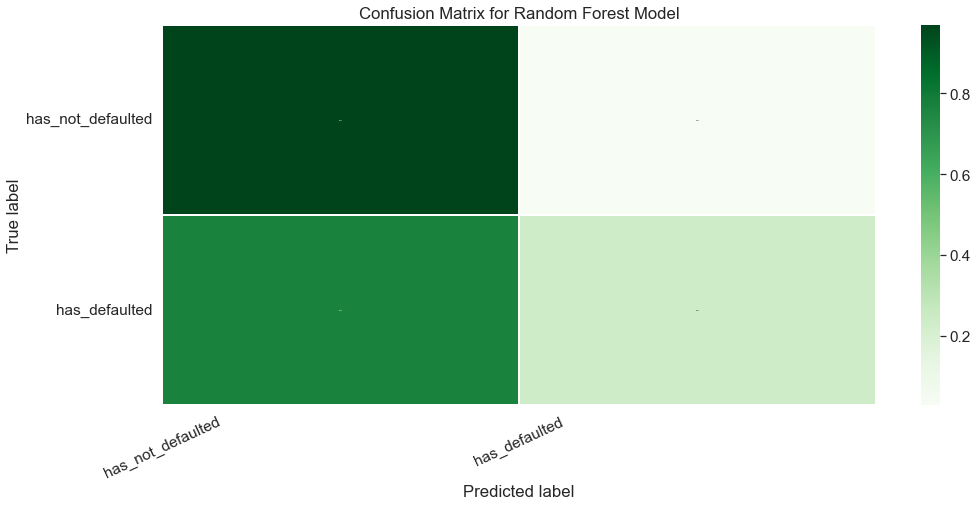

In [48]:

# Get and reshape confusion matrix data
matrix = confusion_matrix(test_labels, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':2},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['has_not_defaulted', 'has_defaulted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [50]:
print(classification_report(test_labels, predictions))


              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1485
           1       0.66      0.23      0.34       375

    accuracy                           0.82      1860
   macro avg       0.75      0.60      0.62      1860
weighted avg       0.80      0.82      0.79      1860

